# Basketball Playoffs Qualification Prediction

## Data Understanding - Information about the Dataset

[**awards_players.csv**](data/original/awards_players.csv) - a table with 95 rows that relates players to awards across 10 seasons.
| Column Name | Description                                  |
|-------------|----------------------------------------------|
| playerID    | A unique code assigned to each player.       |
| award       | The award that the player won.               |
| year        | The year that the player won the award.      |
| lgID        | The league that the player won the award in. |



[**coaches.csv**](data/original/coaches.csv) - a table with 163 rows that describes coaches who've managed teams across 10 seasons.
| Column Name | Description                                           |
|-------------|-------------------------------------------------------|
| coachID     | A unique code assigned to each coach.                 |
| year        | The year that the coach coached the team.             |
| tmID        | The team that the coach coached.                      |
| lgID        | The league that the coach coached in.                 |
| stint       | The number of times the coach coached the team. ???   |
| won         | The number of games the coach won in regular season.  |
| lost        | The number of games the coach lost in regular season. |
| post_wins   | The number of games the coach won in playoffs.        |
| post_losses | The number of games the coach lost in playoffs.       |

[**players.csv**](data/original/players.csv) - a table with 894 rows that contains all the details about the players.
| Column Name  | Description                                  |
|--------------|----------------------------------------------|
| bioID        | A unique code assigned to each player.       |
| pos          | The position that the player plays.          |
| firstseason  | The year that the player started playing.    |
| lastseason   | The year that the player stopped playing.    |
| height       | The height of the player in inches.          | 
| weight       | The weight of the player in pounds.          |
| college      | The college that the player attended.        |
| collegeOther | The other colleges that the player attended. |
| birthDate    | The birth date of the player.                |
| deathDate    | The death date of the player.                |



[**players_teams.csv**](data/original/players_teams.csv) - a table with 1877 that describes the performance of each player for each team they played.
| Column Name | Description                                           |
|-------------|-------------------------------------------------------|
| playerID    | A unique code assigned to each player.                |
| year        | The year that the player played for the team.         |
| stint       | The number of times the player played for the team.?? |
| tmID        | The team that the player played for.                  |
| lgID        | The league that the player played in.                 |
| GP          | The number of games the player played.                |
| GS          | The number of games the player started.               |
|...          | ...                                                   |

[**series_post.csv**](data/original/series_post.csv) - a table with 71 rows that describes the series' results.
| Column Name | Description                                 |
|-------------|---------------------------------------------|
| year        | The year that the series was played.        |
| round       | The round of the series.                    |
| series      | The series label.                           |
| tmIDWinner  | The team that won the series.               |
| lgIDWinner  | The league that the winning team played in. |
| tmIDLoser   | The team that lost the series.              |
| lgIDLoser   | The league that the losing team played in.  |
| W           | The number of games the winning team won.   |
| L           | The number of games the losing team won.    |

[**teams.csv**](data/original/teams.csv) - a table with 143 rows that describes the performance of teams for each season.
| Column Name | Description                                             |
|-------------|---------------------------------------------------------|
| year        | The year that the team played.                          |
| lgID        | The league that the team played in.                     |
| tmID        | The team code.                                          |
| franchID    | The franchise code.                                     |
| confID      | The conference code.                                    |
| divID       | The division code.                                      |
| rank        | The rank of the team in the season.                     |
| playoff     | Whether the team qualified for the playoffs or not.     |
| seeded      | Whether the team was seeded in the playoffs or not.     |
| firstRound  | The result of the team in the first round of playoffs.  |
| semis       | The result of the team in the semi-finals of playoffs.  |
| finals      | The result of the team in the finals of playoffs.       |
| name        | The name of the team.                                   |
| o_fgm       | The number of field goals made by the team.             |
| o_fga       | The number of field goals attempted by the team.        |
| o_ftm       | The number of free throws made by the team.             |
| o_fta       | The number of free throws attempted by the team.        |
| o_3pm       | The number of three-point field goals made by the team. |
| ...         | ...                                                     |

[**teams_post.csv**](data/original/teams_post.csv) - a table with 81 rows that describes the results of each team at the post-season.
| Column Name | Description                                             |
|-------------|---------------------------------------------------------|
| year        | The year that the team played.                          |
| lgID        | The league that the team played in.                     |
| W           | The number of games the team won in the post-season.    |
| L           | The number of games the team lost in the post-season.   |










### Calculate the power of a team

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    
teams = pd.read_csv('data/clean/cleaned_teams.csv')


# Just print the dtypes of the columns that are objects
print(teams.select_dtypes(include=['object']).dtypes)


tmID          object
confID        object
playoff       object
firstRound    object
semis         object
finals        object
dtype: object


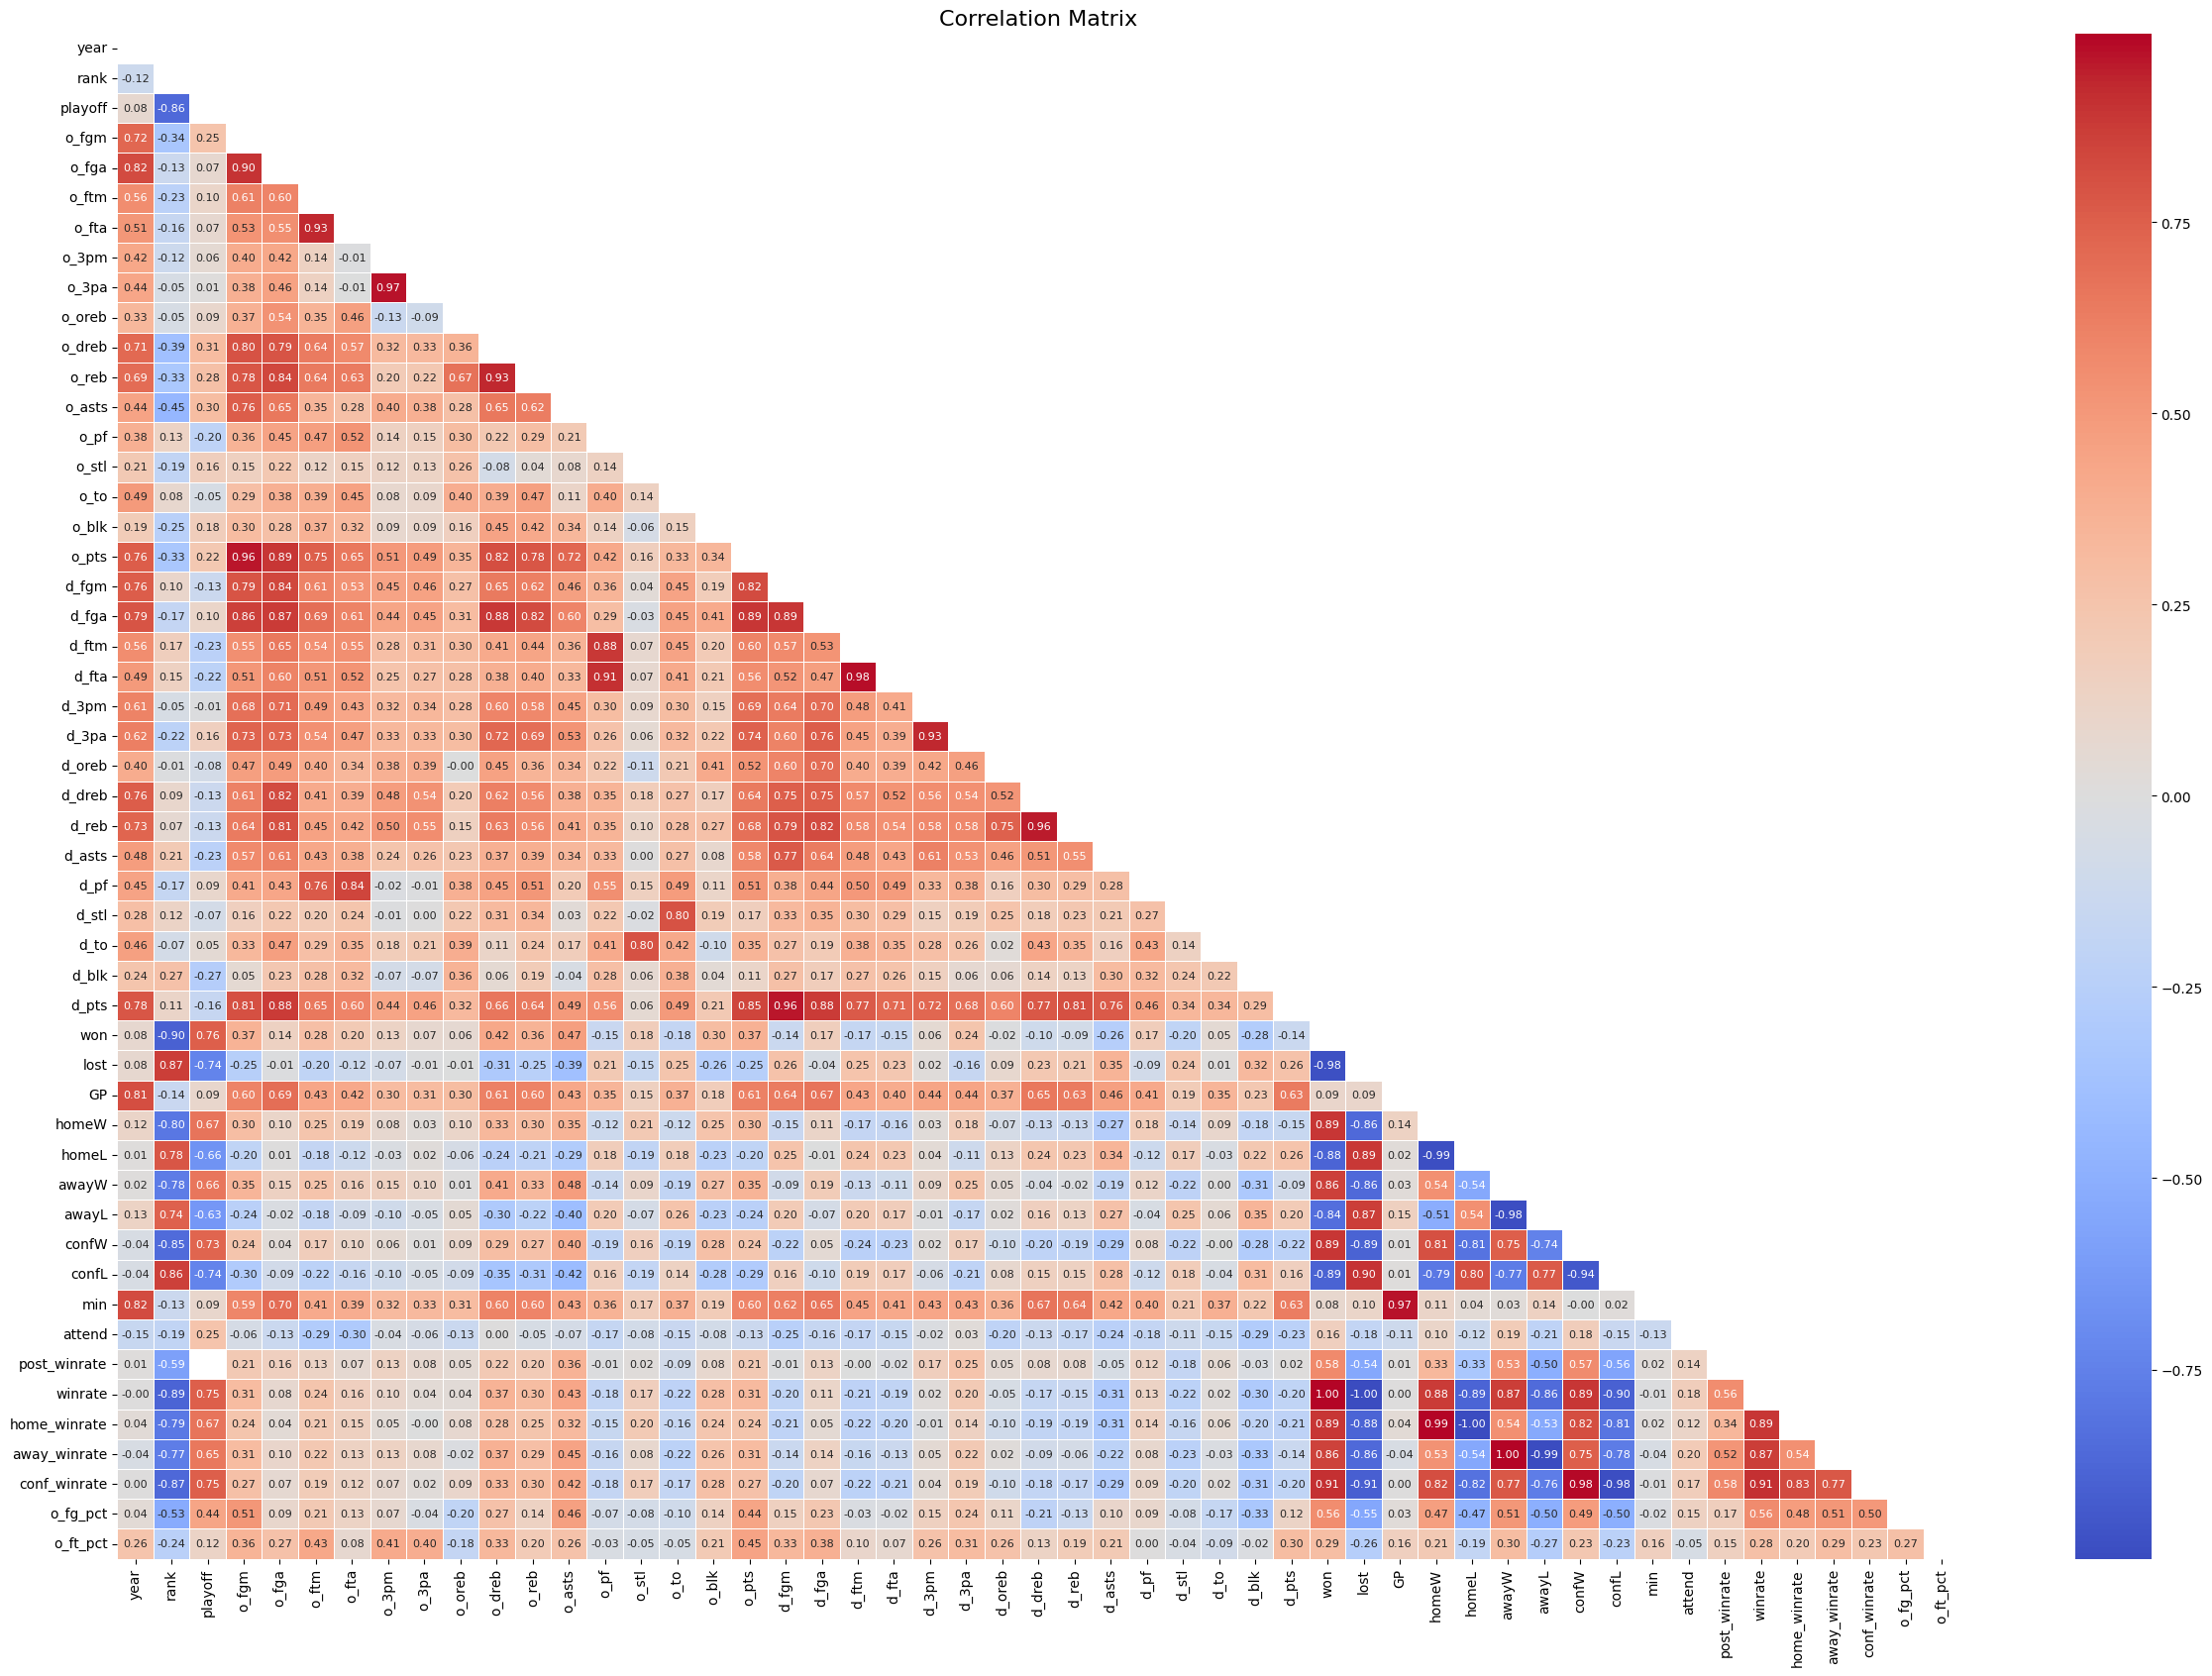

Correlation between target and year: 0.07705063246068848
Correlation between target and rank: -0.8620790896686981
Correlation between target and playoff: 1.0
Correlation between target and o_fgm: 0.2515792808650922
Correlation between target and o_fga: 0.07084000425330679
Correlation between target and o_ftm: 0.1047223173119909
Correlation between target and o_fta: 0.0724933405057681
Correlation between target and o_3pm: 0.060612269288855054
Correlation between target and o_3pa: 0.007957559282677005
Correlation between target and o_oreb: 0.0923630258772151
Correlation between target and o_dreb: 0.30755716728105326
Correlation between target and o_reb: 0.2794116621840806
Correlation between target and o_asts: 0.3032475605334074
Correlation between target and o_pf: -0.2029192427184587
Correlation between target and o_stl: 0.1648824091126278
Correlation between target and o_to: -0.051552794336507696
Correlation between target and o_blk: 0.17871539023127894
Correlation between target and o

{'year': 0.07705063246068848,
 'rank': -0.8620790896686981,
 'playoff': 1.0,
 'o_fgm': 0.2515792808650922,
 'o_fga': 0.07084000425330679,
 'o_ftm': 0.1047223173119909,
 'o_fta': 0.0724933405057681,
 'o_3pm': 0.060612269288855054,
 'o_3pa': 0.007957559282677005,
 'o_oreb': 0.0923630258772151,
 'o_dreb': 0.30755716728105326,
 'o_reb': 0.2794116621840806,
 'o_asts': 0.3032475605334074,
 'o_pf': -0.2029192427184587,
 'o_stl': 0.1648824091126278,
 'o_to': -0.051552794336507696,
 'o_blk': 0.17871539023127894,
 'o_pts': 0.2213991839184398,
 'd_fgm': -0.1300557721536696,
 'd_fga': 0.10293846565632093,
 'd_ftm': -0.23395831262583386,
 'd_fta': -0.2196777440462202,
 'd_3pm': -0.00932954576569799,
 'd_3pa': 0.15591906469556485,
 'd_oreb': -0.07564183752103998,
 'd_dreb': -0.12850329846395211,
 'd_reb': -0.1259703932067607,
 'd_asts': -0.22657617339832037,
 'd_pf': 0.09100503096404654,
 'd_stl': -0.07327419917528492,
 'd_to': 0.048767872705082725,
 'd_blk': -0.2715104834255662,
 'd_pts': -0.163427

In [ ]:
# Calculate the power of a team by year
"""
Offensive Statistics (prefixed with 'o_'):
14. o_fgm: Field goals made
15. o_fga: Field goals attempted
16. o_ftm: Free throws made
17. o_fta: Free throws attempted
18. o_3pm: Three-pointers made
19. o_3pa: Three-pointers attempted
20. o_oreb: Offensive rebounds
21. o_dreb: Defensive rebounds
22. o_reb: Total rebounds
23. o_asts: Assists
24. o_pf: Personal fouls
25. o_stl: Steals
26. o_to: Turnovers
27. o_blk: Blocks
28. o_pts: Points scored
Defensive Statistics (prefixed with 'd_'):
29. d_fgm: Field goals made by opponents
30. d_fga: Field goals attempted by opponents
31. d_ftm: Free throws made by opponents
32. d_fta: Free throws attempted by opponents
33. d_3pm: Three-pointers made by opponents
34. d_3pa: Three-pointers attempted by opponents
35. d_oreb: Offensive rebounds by opponents
36. d_dreb: Defensive rebounds by opponents
37. d_reb: Total rebounds by opponents
38. d_asts: Assists by opponents
39. d_pf: Personal fouls by opponents
40. d_stl: Steals by opponents
41. d_to: Turnovers by opponents
42. d_blk: Blocks by opponents
43. d_pts: Points scored by opponents

"""

def calculate_power(teams):
    # Calculate the power of a team by year

    # Columns : year,tmID,confID,rank,playoff,firstRound,semis,finals,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_3pm,d_3pa,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,won,lost,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,post_winrate

    # Season Performance
    teams['winrate'] = teams['won'] / teams['GP']
    
    teams['home_winrate'] = teams['homeW'] / (teams['homeW'] + teams['homeL'])
    
    teams['away_winrate'] = teams['awayW'] / (teams['awayW'] + teams['awayL'])
    
    teams['conf_winrate'] = teams['confW'] / (teams['confW'] + teams['confL'])
    # Offensive Statistics

    # Field goal percentage
    teams['o_fg_pct'] = teams['o_fgm'] / teams['o_fga']

    # Free throw percentage
    teams['o_ft_pct'] = teams['o_ftm'] / teams['o_fta']

    # Three-point percentage
    o_3p_pct = teams['o_3pm'] / teams['o_3pa']

    # Offensive rebound percentage
    o_oreb_pct = teams['o_oreb'] / teams['o_reb']

    # Defensive rebound percentage
    o_dreb_pct = teams['o_dreb'] / teams['o_reb']
    
    # Assist to turnover ratio
    o_ast_to = teams['o_asts'] / teams['o_to']

    return teams

teams = calculate_power(teams)



    #Correlation matrix between columns and playoff just use the numeric columns
def correlation_matrix(dataframe):

    #convert playoff to numeric Y = 1, N = 0
    dataframe['playoff'] = dataframe['playoff'].apply(lambda x: 1 if x == 'Y' else 0)

    #remove non-numeric columns
    dataframe = dataframe.select_dtypes(include=['float64', 'int64'])

    corr_matrix = dataframe.corr()


    target_correlation = corr_matrix['playoff']

    plt.figure(figsize=(30, 20))

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidths=0.5, fmt=".2f")

    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

    dict = {}

    for feature, correlation in target_correlation.items():
        print(f"Correlation between target and {feature}: {correlation}")
        dict[feature] = correlation

    return dict

correlation_matrix(teams)